# House prices 

A regressão é uma técnica estatística amplamente utilizada, que permite modelar e prever a relação entre variáveis, oferecendo insights valiosos para a compreensão de fenômenos e a tomada de decisões. Neste notebook, é apresentado um trabalho de regressão utilizando a linguagem de programação Python, realizado com o objetivo de prever o preço de casas da cidade de Aimes, em Iowa. Para isso, foi utilizado os dados de treino train.csv disponibilizado pelo Kaggle, plataforma de Aprendizado de Máquina e Ciência de Dados que oferece diversos conjuntos de dados públicos para desafios e análises de dados. Assim, será apresentado as etapas do processo e os resultados obtidos.


## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

## Leitura dos dados

In [60]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## AED

In [62]:
df = df.drop(["Id"], axis=1)

In [63]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.median()

In [69]:
df.var()

TypeError: could not convert string to float: 'RL'

**Identificando os valores nan**

In [86]:
# Porcentagem de valores nan por coluna
round(df.isna().sum()[df.isna().sum()>0].sort_values(ascending = False)/len(df)*100,2)

Series([], dtype: float64)

As variáveis *PoolQC, MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond e BsmtQual* são variáveis categóricas que possuem valores nan. No entanto, pelo data_description fornecido pelo desafio esses valores nan podem corresponder a ausência de determinadas características e não apenas a falta de dado.

A variável *Electrical* é uma variável categórica com valores nan

As variáveis *LotFrontage e MasVnrArea* são variáveis numéricas com valores nan.

In [8]:
# df.isna().sum()[df.isna().sum()>0].sort_values().plot(kind = "barh")

In [76]:
df['PoolQC'].fillna('None', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)
df['Alley'].fillna('None', inplace=True)
df['Fence'].fillna('None', inplace=True)
df['MasVnrType'].fillna('None', inplace=True)
df['FireplaceQu'].fillna('None', inplace=True)
df['GarageType'].fillna('None', inplace=True)
df['GarageYrBlt'].fillna('None', inplace=True)
df['GarageFinish'].fillna('None', inplace=True)
df['GarageQual'].fillna('None', inplace=True)
df['GarageCond'].fillna('None', inplace=True)
df['BsmtFinType2'].fillna('None', inplace=True)
df['BsmtExposure'].fillna('None', inplace=True)
df['BsmtFinType1'].fillna('None', inplace=True)
df['BsmtCond'].fillna('None', inplace=True)
df['BsmtQual'].fillna('None', inplace=True)

In [78]:
df['Electrical'].fillna('Unknown', inplace=True)

In [80]:
mean_size = df['LotFrontage'].median()
df['LotFrontage'].fillna(mean_size, inplace=True)

In [81]:
mean_size = df['MasVnrArea'].median()
df['MasVnrArea'].fillna(mean_size, inplace=True)

**Identificando valores duplicados**

In [9]:
df.duplicated().sum()

0

**Distribuição das variáveis**

C:\Users\CamilaHiura\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x600 with 0 Axes>

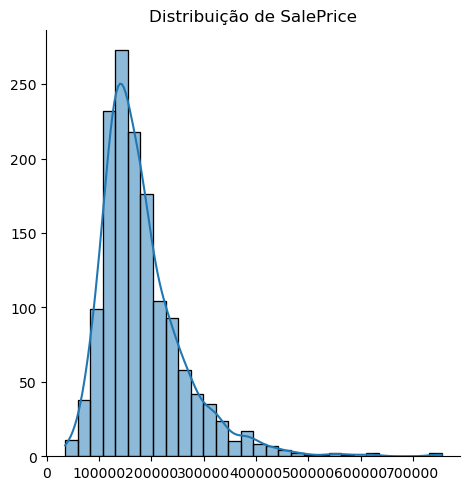

In [38]:
# Distribuição da variável resposta
plt.figure(figsize = (10,6))
sns.displot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribuição de SalePrice")
plt.xlabel('')
plt.ylabel('')
plt.show()

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

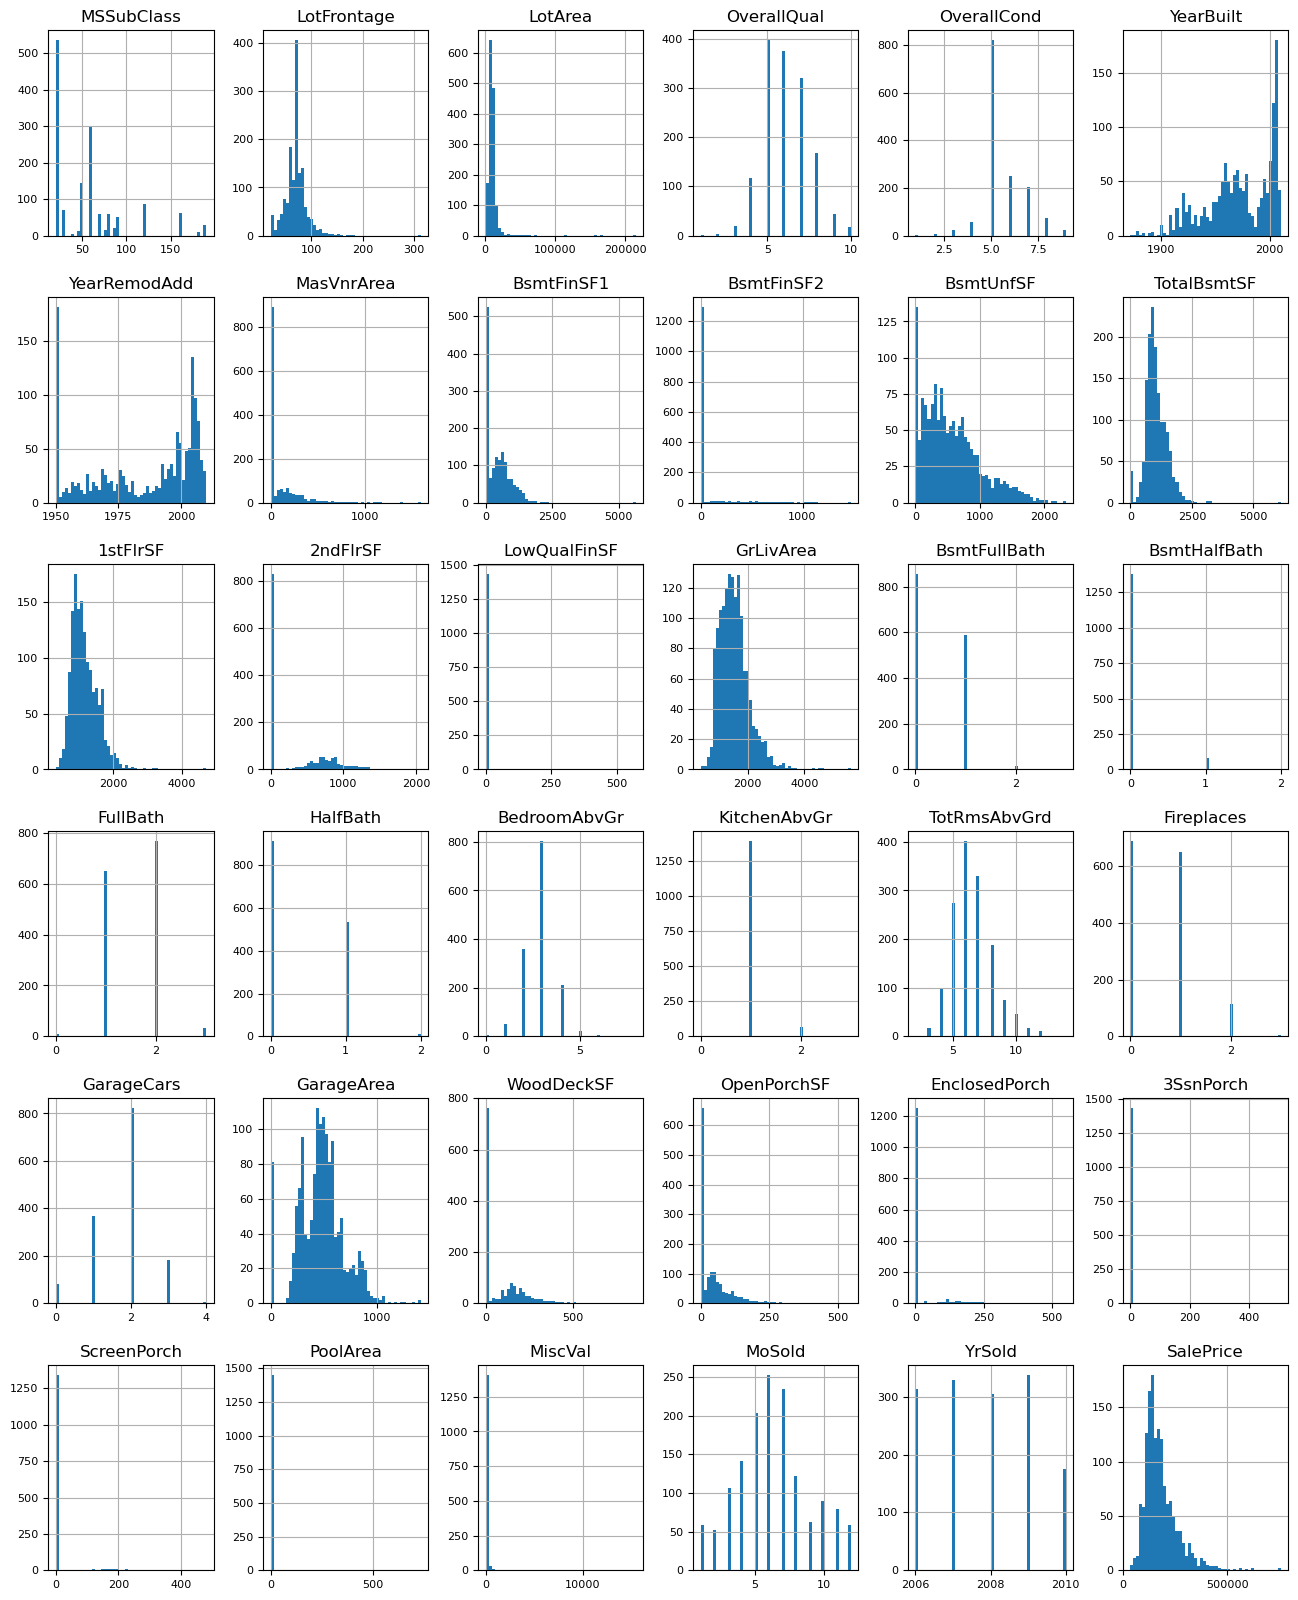

In [85]:
# Distribuição das variáveis numéricas
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [87]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr().round(2), annot = True)

ValueError: could not convert string to float: 'RL'

<Figure size 1500x800 with 0 Axes>

## Pré processamento dos dados

**Normalização**

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler_minMax = MinMaxScaler()

In [83]:
df_normalized = pd.DataFrame(scaler_minMax.fit_transform(df))

ValueError: could not convert string to float: 'RL'

## Train Test Split

In [17]:
X = df.drop(columns=["SalePrice"])
y = df['SalePrice']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Modelagem

**Regressão Linear**

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [42]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

ValueError: could not convert string to float: 'RL'